In [1]:
import numpy as np

# Generate sine wave data
x = np.linspace(0, 50, 500)  # 500 points from 0 to 50
y = np.sin(x)

# Create sequences of 5 consecutive values and their corresponding next 5 values
input_seq = []
target_seq = []

for i in range(len(y) - 10):
    input_seq.append(y[i:i+5])
    target_seq.append(y[i+5:i+10])

input_seq = np.array(input_seq)
target_seq = np.array(target_seq)


In [2]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
input_train, input_test, target_train, target_test = train_test_split(input_seq, target_seq, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

model = Sequential([
    # Encoder
    LSTM(50, activation='relu', input_shape=(5, 1)),
    RepeatVector(5),  # Set the output sequence length

    # Decoder
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 50)             0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              51        
 ributed)                                                        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Reshape the data to fit the RNN input shape
input_seq = input_seq.reshape((input_seq.shape[0], input_seq.shape[1], 1))
target_seq = target_seq.reshape((target_seq.shape[0], target_seq.shape[1], 1))

from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
input_train, input_test, target_train, target_test = train_test_split(input_seq, target_seq, test_size=0.2, random_state=42)

# Train the model
model.fit(input_seq, target_seq, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
13/13 [==============================] - 8s 56ms/step - loss: 0.4705 - val_loss: 0.3967
Epoch 2/200
13/13 [==============================] - 0s 25ms/step - loss: 0.3661 - val_loss: 0.2559
Epoch 3/200
13/13 [==============================] - 0s 23ms/step - loss: 0.2372 - val_loss: 0.1889
Epoch 4/200
13/13 [==============================] - 0s 22ms/step - loss: 0.1881 - val_loss: 0.1724
Epoch 5/200
13/13 [==============================] - 0s 25ms/step - loss: 0.1663 - val_loss: 0.1501
Epoch 6/200
13/13 [==============================] - 0s 24ms/step - loss: 0.1422 - val_loss: 0.1371
Epoch 7/200
13/13 [==============================] - 0s 23ms/step - loss: 0.1198 - val_loss: 0.1112
Epoch 8/200
13/13 [==============================] - 0s 39ms/step - loss: 0.1002 - val_loss: 0.0808
Epoch 9/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0716 - val_loss: 0.0575
Epoch 10/200
13/13 [==============================] - 1s 54ms/step - loss: 0.0516 - val_loss: 0.0623

In [6]:
# Predict the next 5 values for a given sequence
test_seq = np.array([np.sin(1), np.sin(1.1), np.sin(1.2), np.sin(1.3), np.sin(1.4)])
test_seq = test_seq.reshape((1, 5, 1))
predicted_seq = model.predict(test_seq)
print(predicted_seq)


1/1 [==============================] - 0s 414ms/step
[[[1.0028762 ]
  [1.0099921 ]
  [1.0021427 ]
  [0.98068345]
  [0.95520747]]]


In [7]:
# Let's take a sample from our dataset for comparison
sample_indices = np.random.choice(len(input_seq), 5)  # Taking 5 random samples for demonstration

for idx in sample_indices:
    test_seq = input_seq[idx]
    actual_output = target_seq[idx]
    predicted_output = model.predict(test_seq.reshape(1, 5, 1))

    print("Input Sequence:", test_seq.flatten())
    print("Actual Output:", actual_output.flatten())
    print("Predicted Output:", predicted_output.flatten())
    print("------")


1/1 [==============================] - 0s 19ms/step
Input Sequence: [0.58987484 0.50614014 0.41732799 0.32432931 0.22807706]
Actual Output: [ 0.1295368   0.02969706 -0.07044059 -0.1698716  -0.26759851]
Predicted Output: [ 0.12864015  0.03699744 -0.05820611 -0.15684608 -0.25619185]
------
1/1 [==============================] - 0s 19ms/step
Input Sequence: [-0.60868607 -0.52626584 -0.43856625 -0.34646709 -0.25089226]
Actual Output: [-0.15280055 -0.05317599  0.04698201  0.14666871  0.24488407]
Predicted Output: [-0.14097117 -0.05482066  0.05099359  0.15124054  0.24887702]
------
1/1 [==============================] - 0s 20ms/step
Input Sequence: [-0.01161883 -0.11158661 -0.21043499 -0.30717234 -0.40082822]
Actual Output: [-0.49046311 -0.57517781 -0.65412248 -0.72650518 -0.79159978]
Predicted Output: [-0.4950525  -0.573665   -0.6530459  -0.7256559  -0.78808904]
------
1/1 [==============================] - 0s 19ms/step
Input Sequence: [0.35178854 0.44366268 0.53108613 0.61318186 0.68912632

1/1 [==============================] - 0s 18ms/step


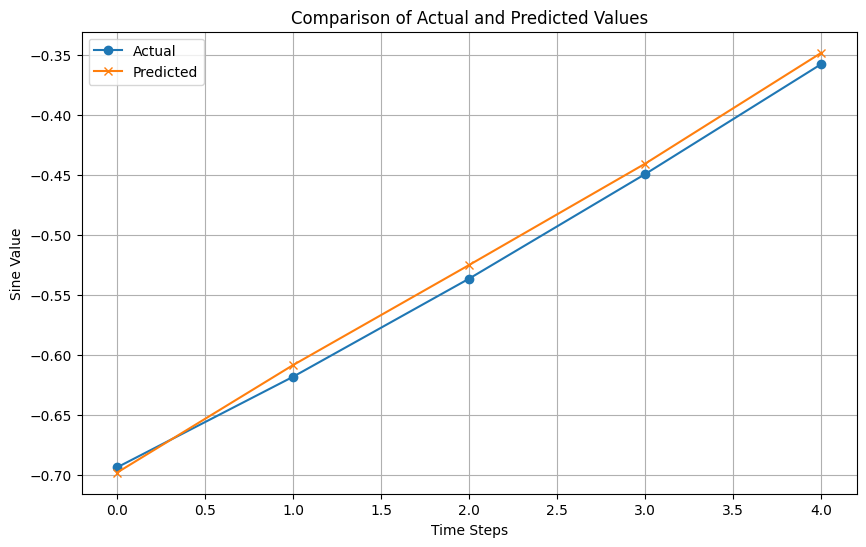

In [8]:
import matplotlib.pyplot as plt

# For demonstration, let's take a random sample from our dataset
idx = np.random.choice(len(input_seq))
test_seq = input_seq[idx]
actual_output = target_seq[idx]
predicted_output = model.predict(test_seq.reshape(1, 5, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(5), actual_output.flatten(), 'o-', label='Actual')
plt.plot(np.arange(5), predicted_output.flatten(), 'x-', label='Predicted')
plt.legend()
plt.title("Comparison of Actual and Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 19ms/step


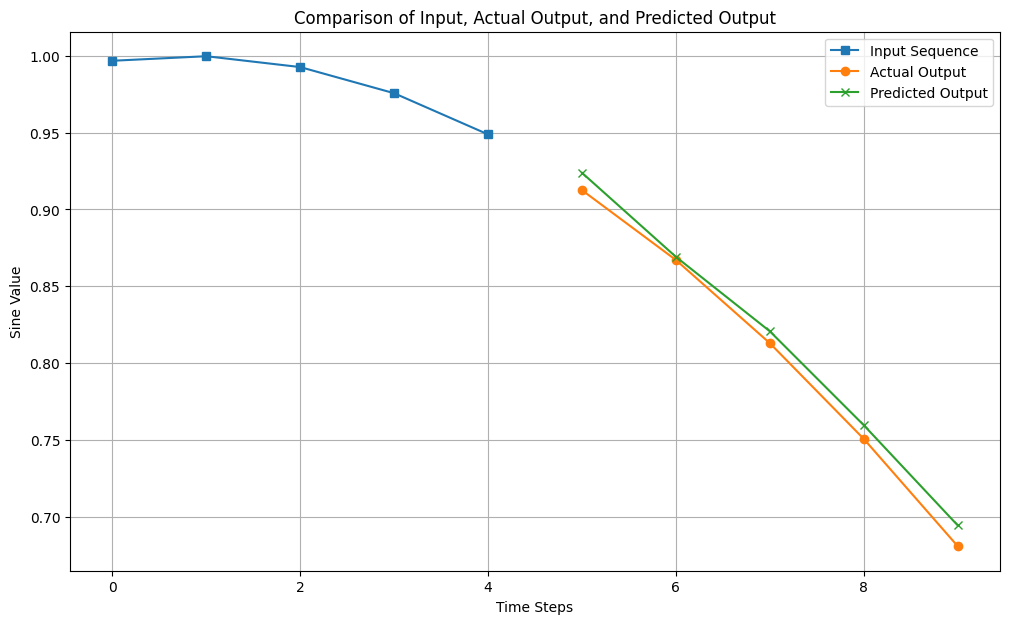

In [12]:
import matplotlib.pyplot as plt

# For demonstration, let's take a random sample from our dataset
idx = np.random.choice(len(input_seq))
test_seq = input_seq[idx]
actual_output = target_seq[idx]
predicted_output = model.predict(test_seq.reshape(1, 5, 1))

# Plotting
plt.figure(figsize=(12, 7))

# Plotting the input sequence
plt.plot(np.arange(5), test_seq.flatten(), 's-', label='Input Sequence')

# Plotting the actual and predicted output
# We offset by 5 on the x-axis to place it after the input sequence
plt.plot(np.arange(5, 10), actual_output.flatten(), 'o-', label='Actual Output')
plt.plot(np.arange(5, 10), predicted_output.flatten(), 'x-', label='Predicted Output')

plt.legend()
plt.title("Comparison of Input, Actual Output, and Predicted Output")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()
